## NLP -- Natural language processing introduction
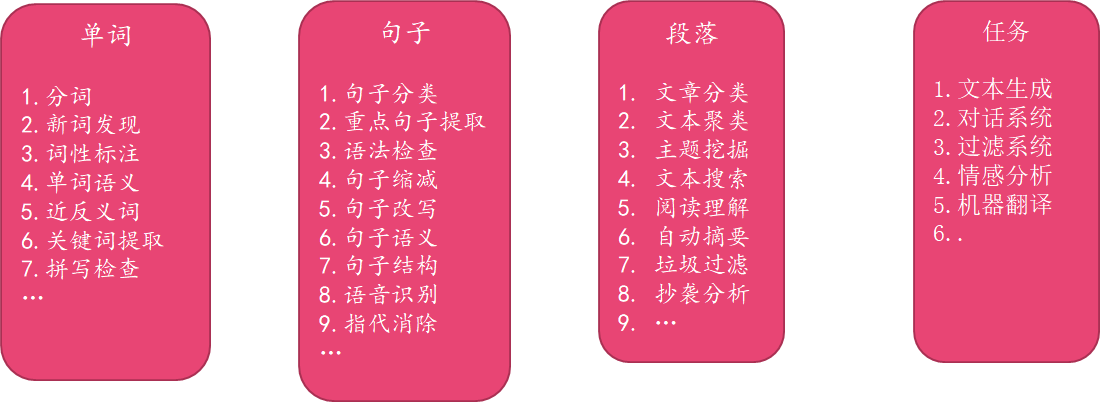

## 自然语言处理任务的特点 The features of NLP
+ 1. 存在特别广泛
+ 2. 杂乱信息多
+ 3. 推理性难解决
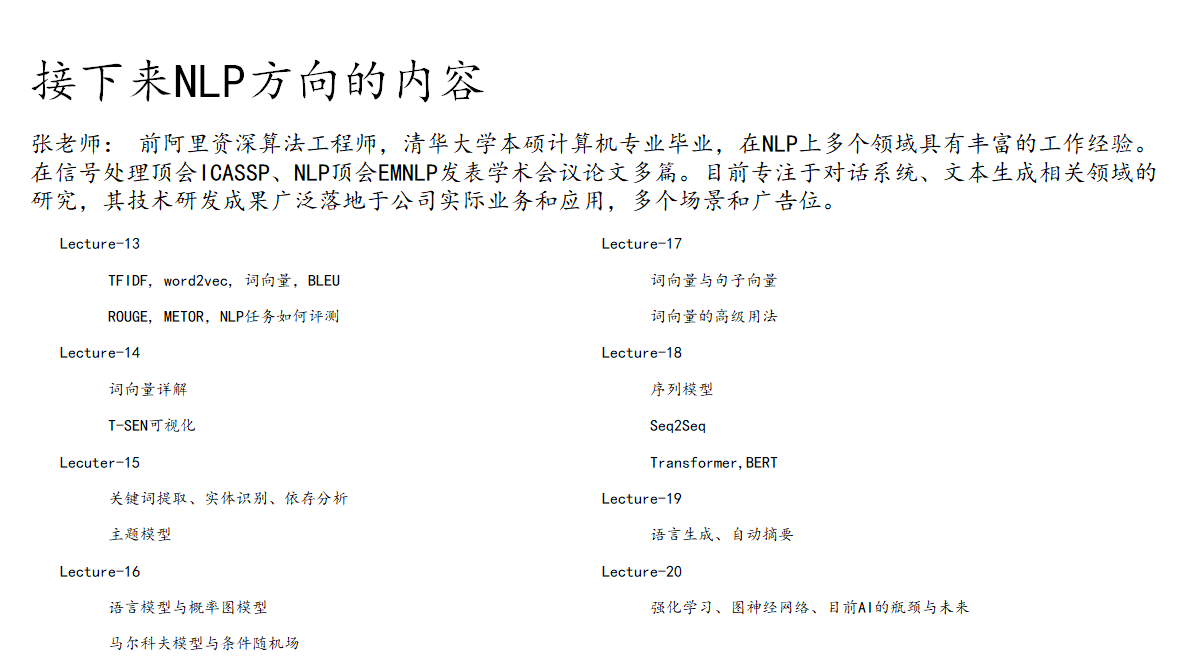

## 这几个方向哪个难，哪个简单
+ 1.NLP 要求：创新能力，编程能力
+ 2.CV 要求：大的项目经历，及论文，图像处理，数学变换，发展最成熟，学历：硕士
+ 3.BI 要求：统计、分析，数学，代码量相对少一些

# 现实工作中，很少有人自己去搭建深度学习的框架，原因：
+ 1.耗费大量人力物力
+ 2.效果往往不如已经开源的那些模型

## 1. 不同CNN模型的演化与对比 Different CNN Architectures

+ Le-Net 5
+ Alex-net
+ VGG-Net
+ Res-net
+ Inception (Google Net)

## Le-Net 5 人类历史上第一个真正投入使用的模型
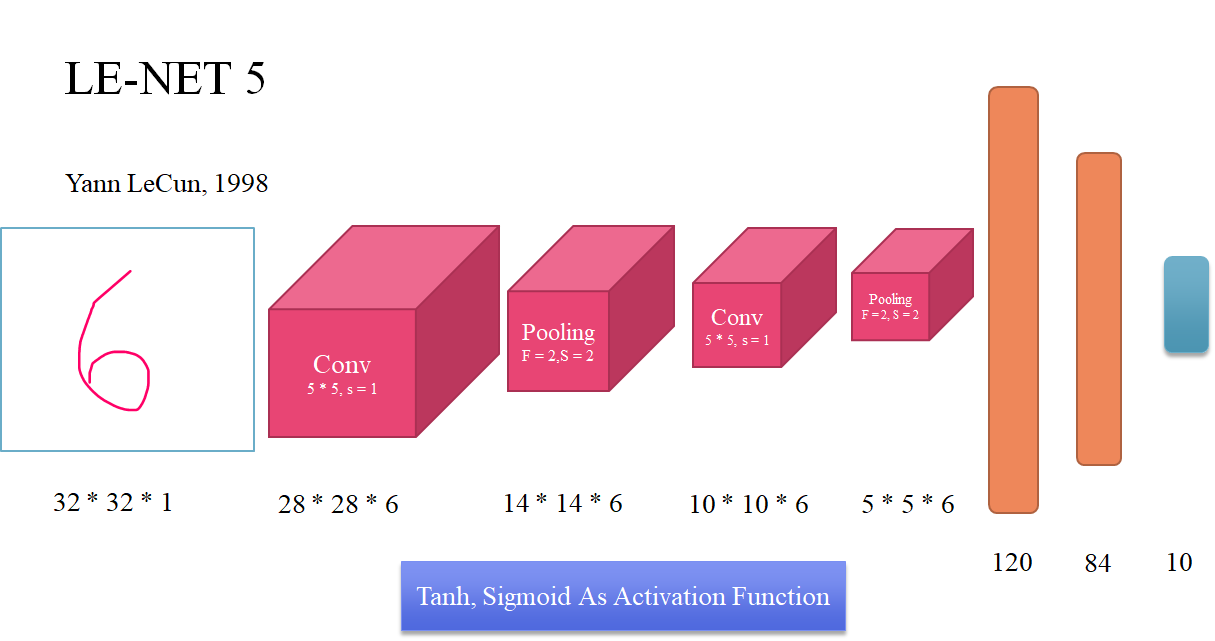

## Alex-net 2012年，重大影响，发展三四十年才能达到，但2012一年就达到了
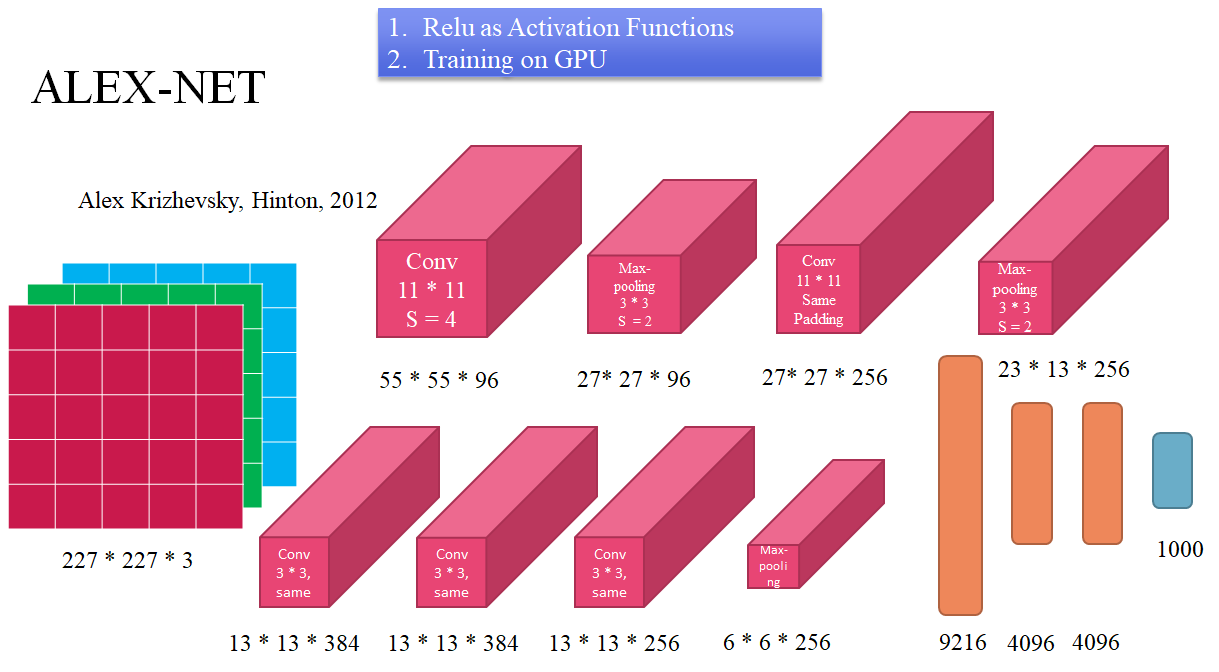

## VGG-Net 特点：非常深，第一个让深度学习变得非常深的深度学习，从VGG网络之后，主流的网络都变的非常非常深
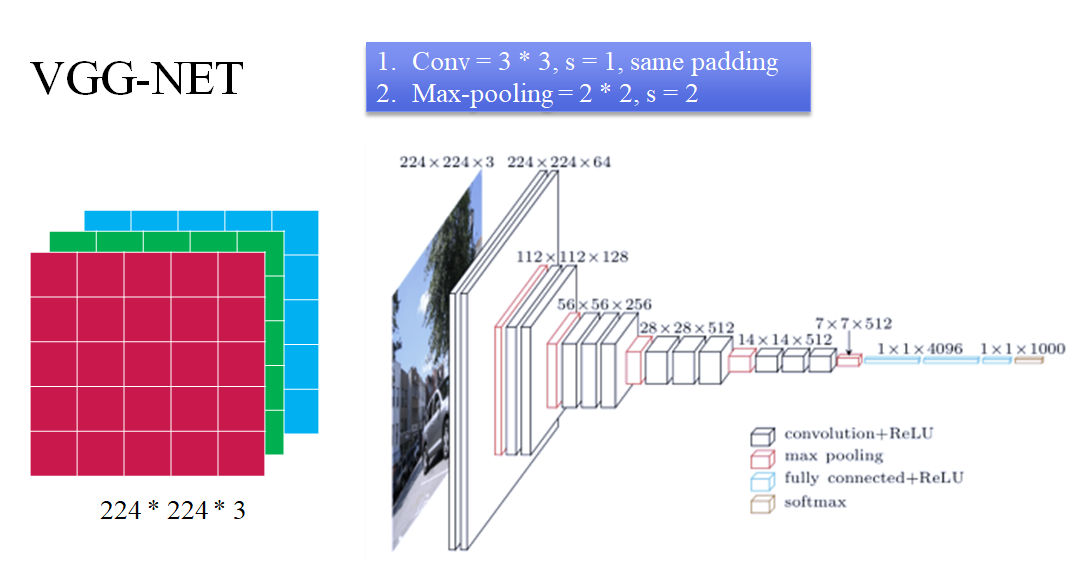

## Res-net 随着模型深度增加，会梯度消失或梯度爆炸，resblock用非常简单的方法解决了梯度消失的问题
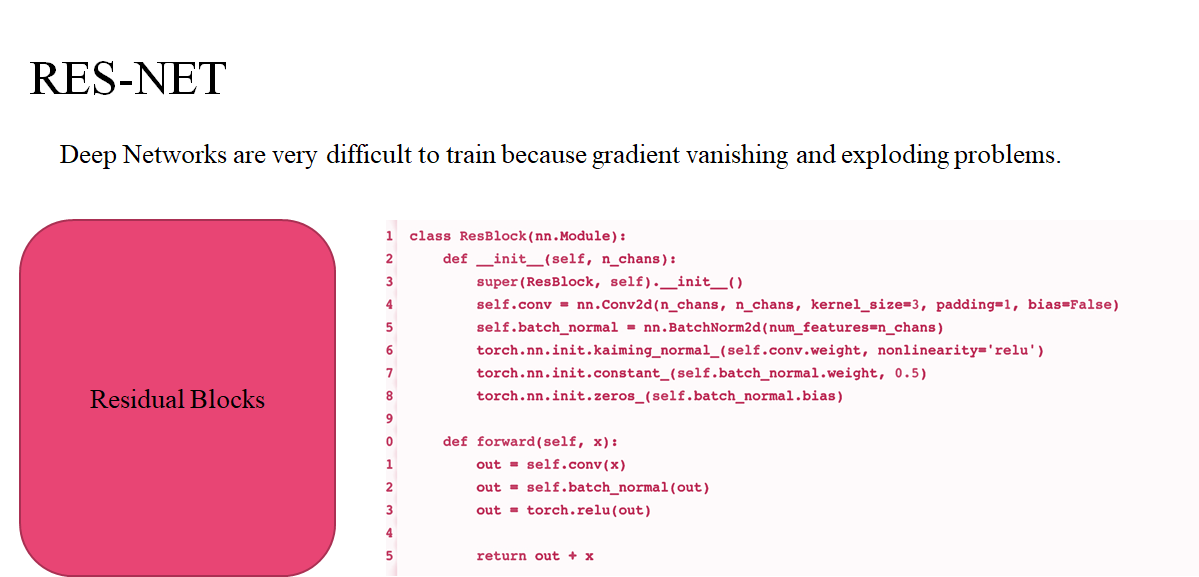

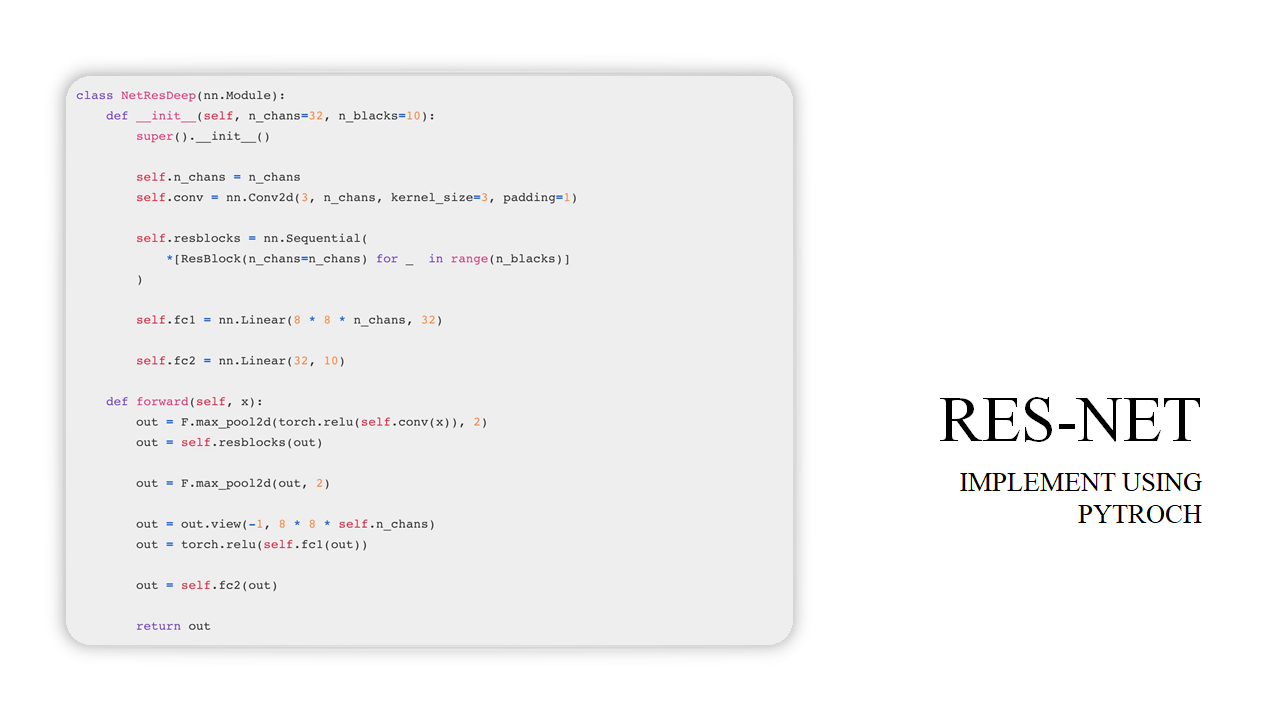

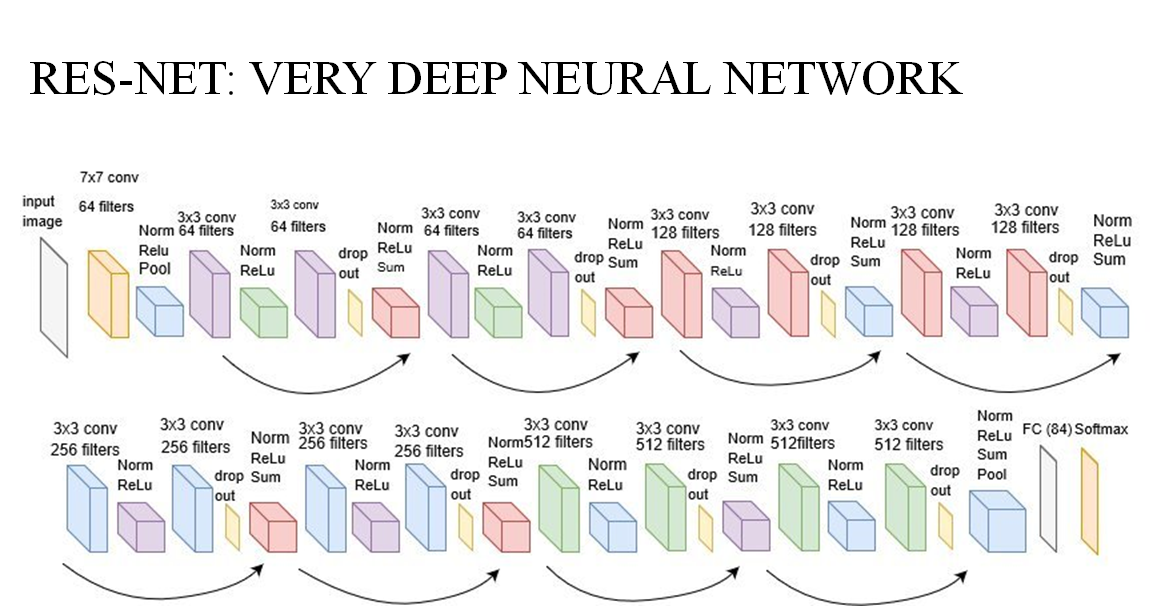

## Inception (Google Net)
+ 第一个思想：I need them all 所有的模型都要
+ Inception
                                                                                   A:3,B:8,C:8,D:5
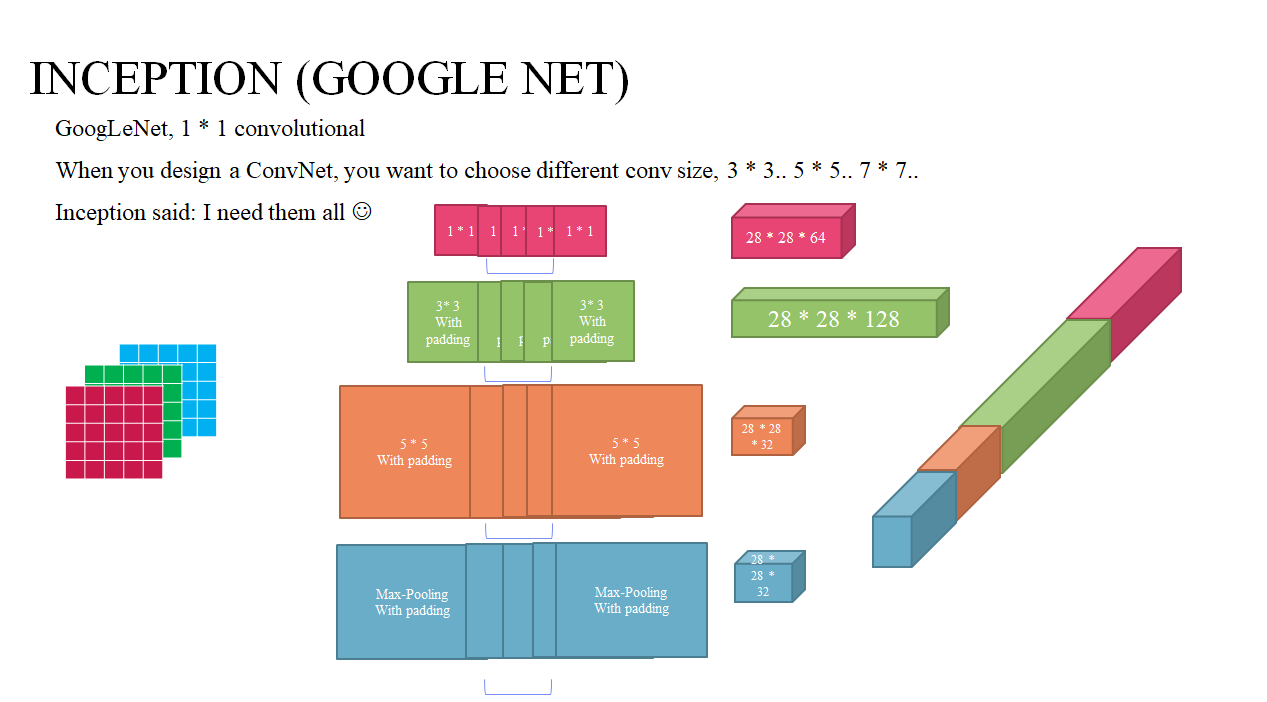

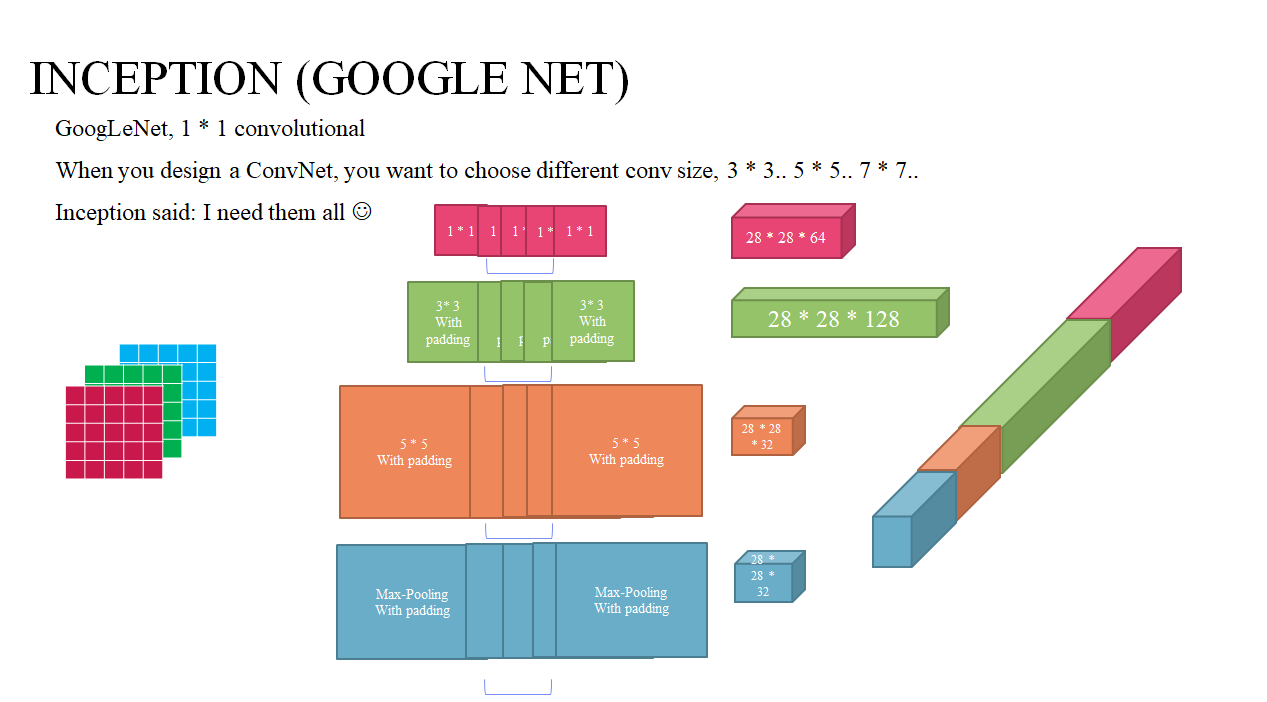

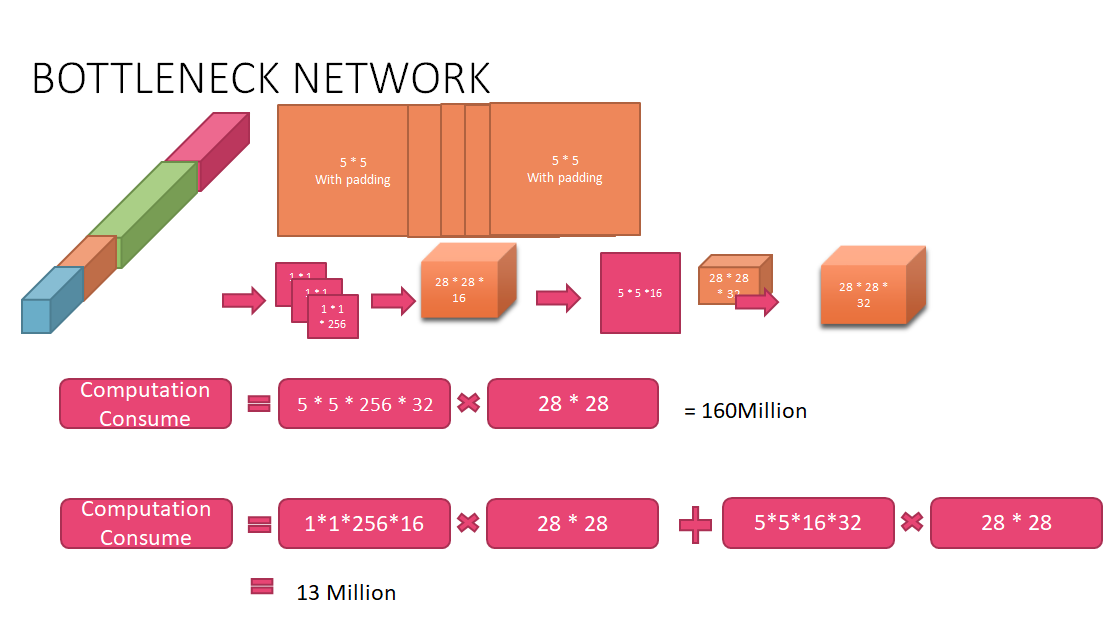

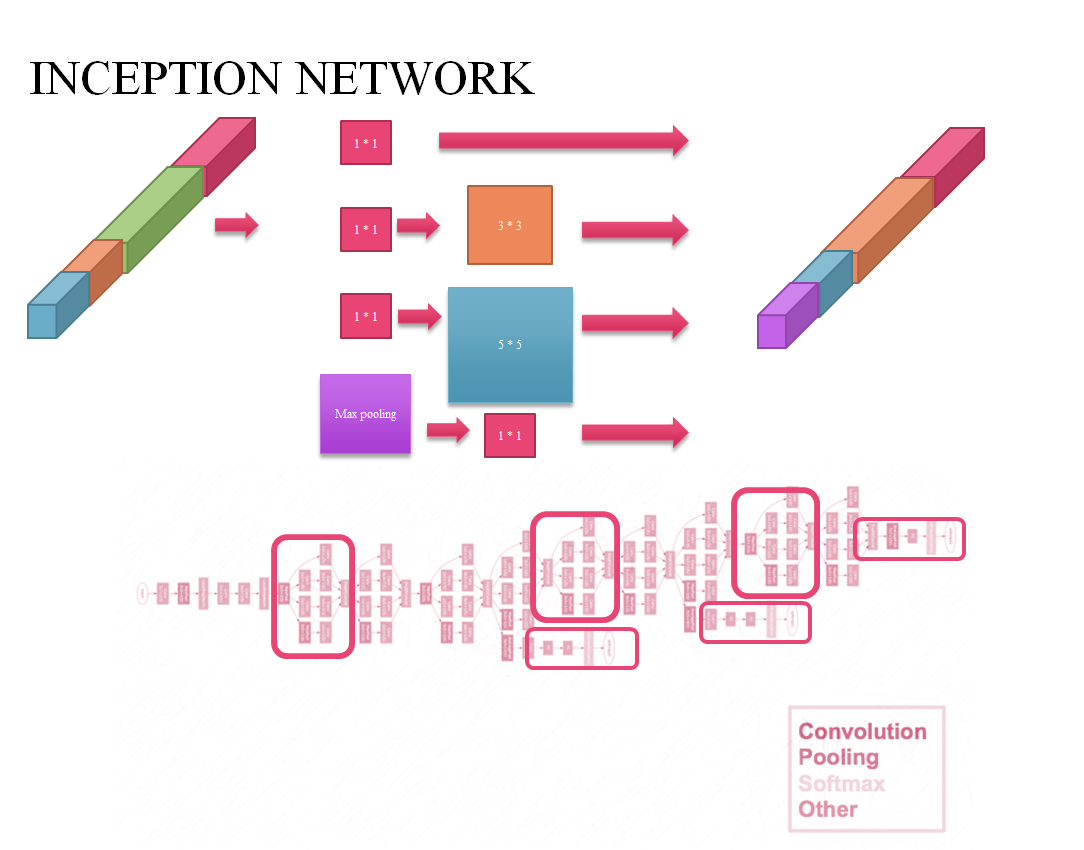

## 2. 迁移学习 Transfer Learning 

#### 人们发现：针对不同的分类任务，前边的卷积层参数几乎一样。人们在想，用不同的模型的时候，不只运用模型，还运用前边卷积层的权值，卷积的参数，只改变全连接层后边的参数，这样即用了一个复杂的网络结构，但是需要的数据量大大减小，这种学习方法叫做迁移学习。

#### 迁移学习随着我们问题量越来越大，普遍采用的一种方法，即在别人的基础上作微调 Finetuning

#### 具体做法：
+ 导入模型，假设resnet
+ pretrained = True 把之前的权值全部下载下来
+ 导入新的图片
+ 已知resnet的输入为224，需要定义一个transfroms
+ 预测，输出预测结果，次数出现问题，模型在它的数据集上运行的结果好，但是新的数据集不一定好，需要修改全连接层参数

```python
for param in res_net.parameters():
    param.requires_grad = False # 不让它做梯度下降

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = res_net.fc.in_features

res_net.fc = nn.Linear(num_ftrs, 10) # only update this part parameters 新加的层，全连接层，input feature:num_ftrs,output feature:10

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(res_net.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
```

#### 迁移学习需要考察以下问题：
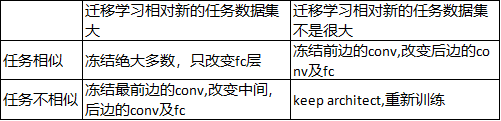

## 3. 不同的优化器 Different Optimizer 
+ SGD
+ Batch Gradient Descent 
+ Adam
+ Momentum
+ RMS-Prop

#### 最原始的优化器
$$ x = x + (-1)*\frac{\partial{y}}{\partial{x}}\alpha $$

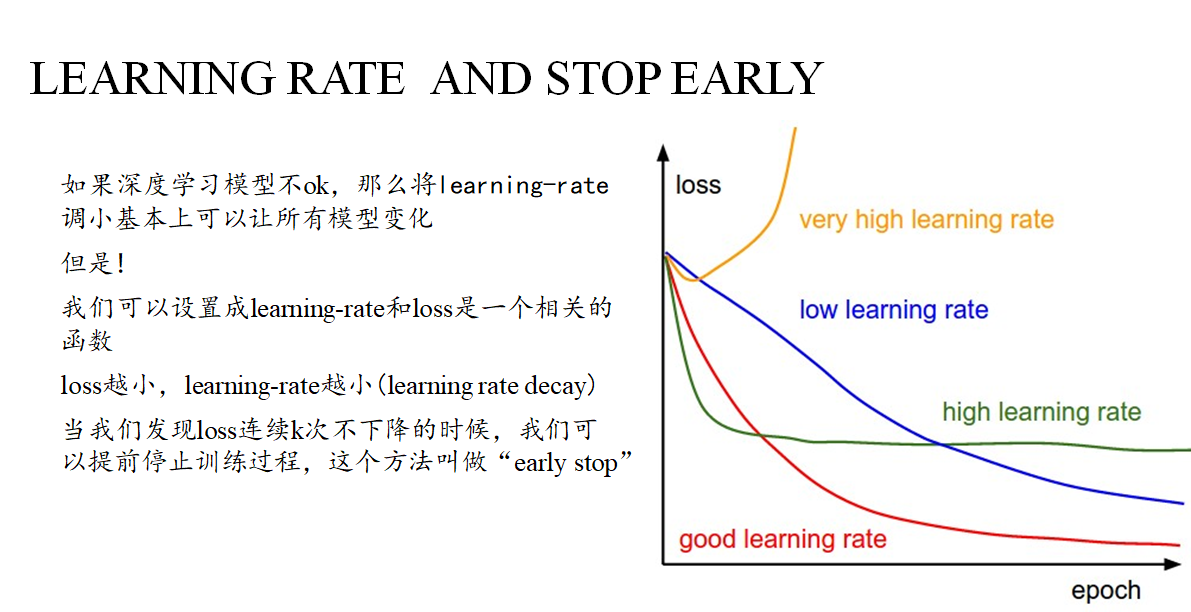

#### 最常见的三种梯度下降方法：
+ Batch Gradient Descent 求梯度时，loss是所有输入点的loss,求偏导时对所有的点求偏导
+ Mini-Batch Gradient Descent 送进去一部分
+ Stochastic Gradient Descent 只送进去一个，优点：快，缺点：因为是随机值，每次随机取一个，训练结果可能不好

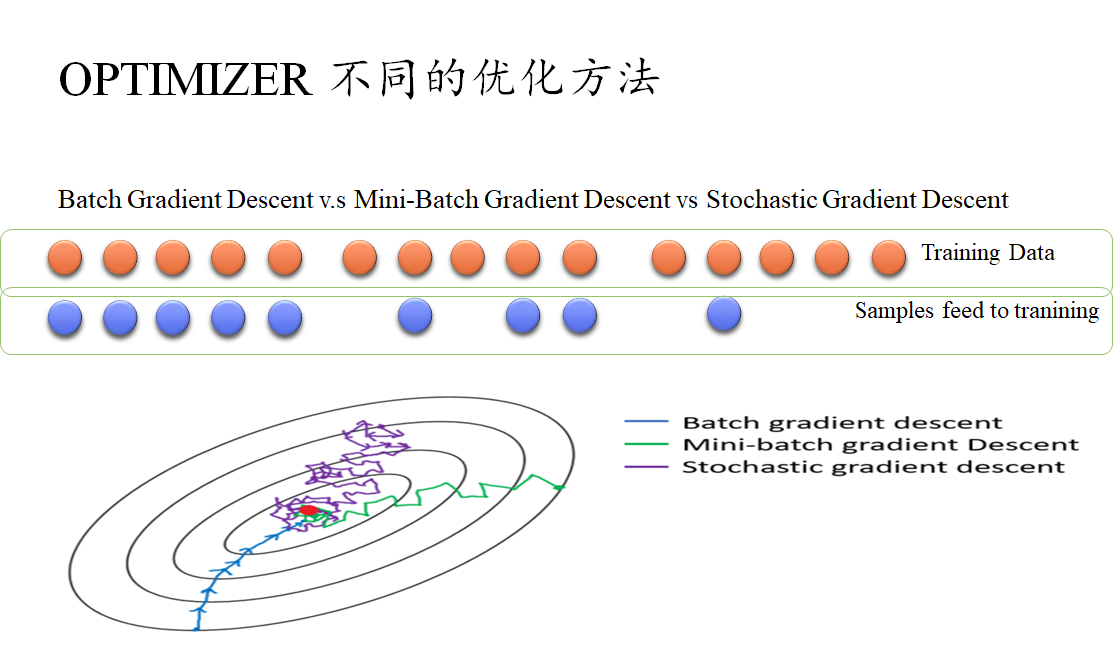

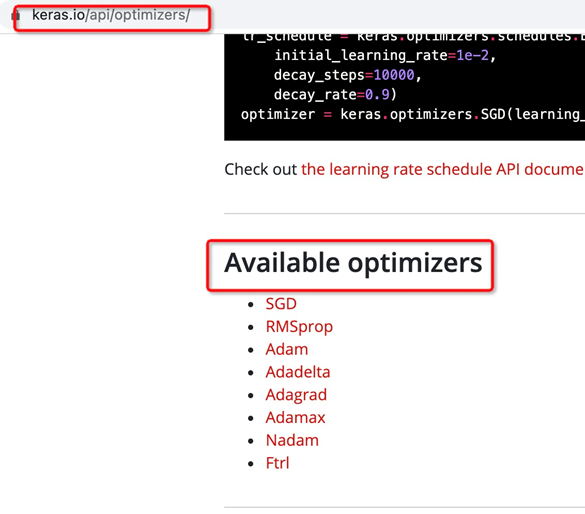

#### optimizer:momentum 动量，下一次梯度下降的时候，把上一次的梯度考虑进去
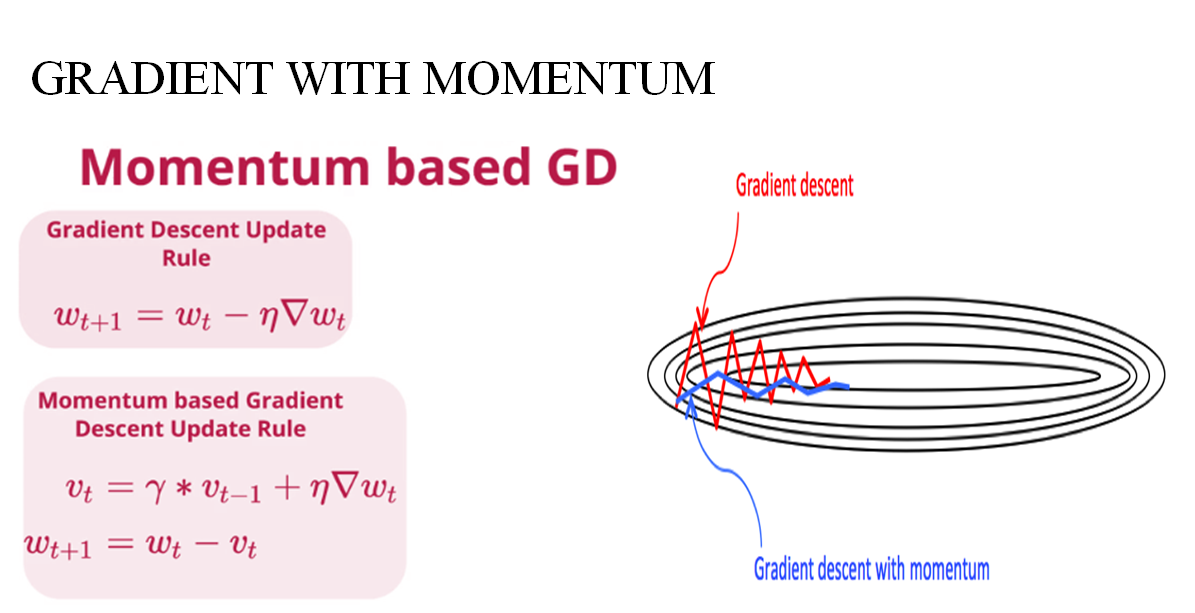

#### optimizer:RMS-prop (Root mean square prop)
+ 当loss对w的偏导很大的时候，S也会变大，除去S后，会变小，当loss对w的偏导很大的时候，做了一个中和
+ 采用了动量的思想，把上一次的S也考虑进去
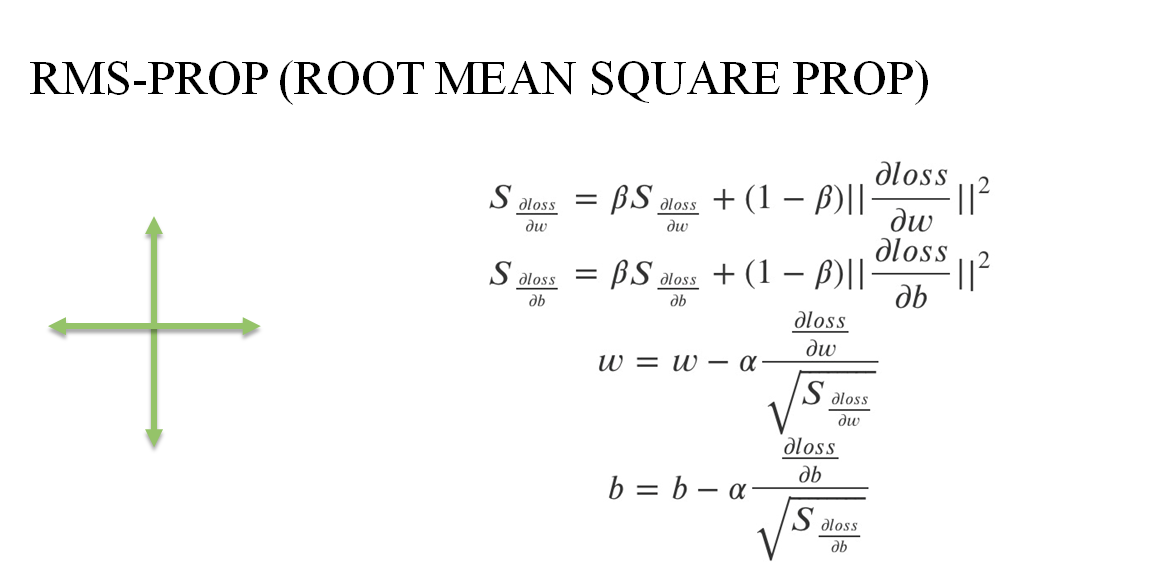

#### optimizer:ADAM
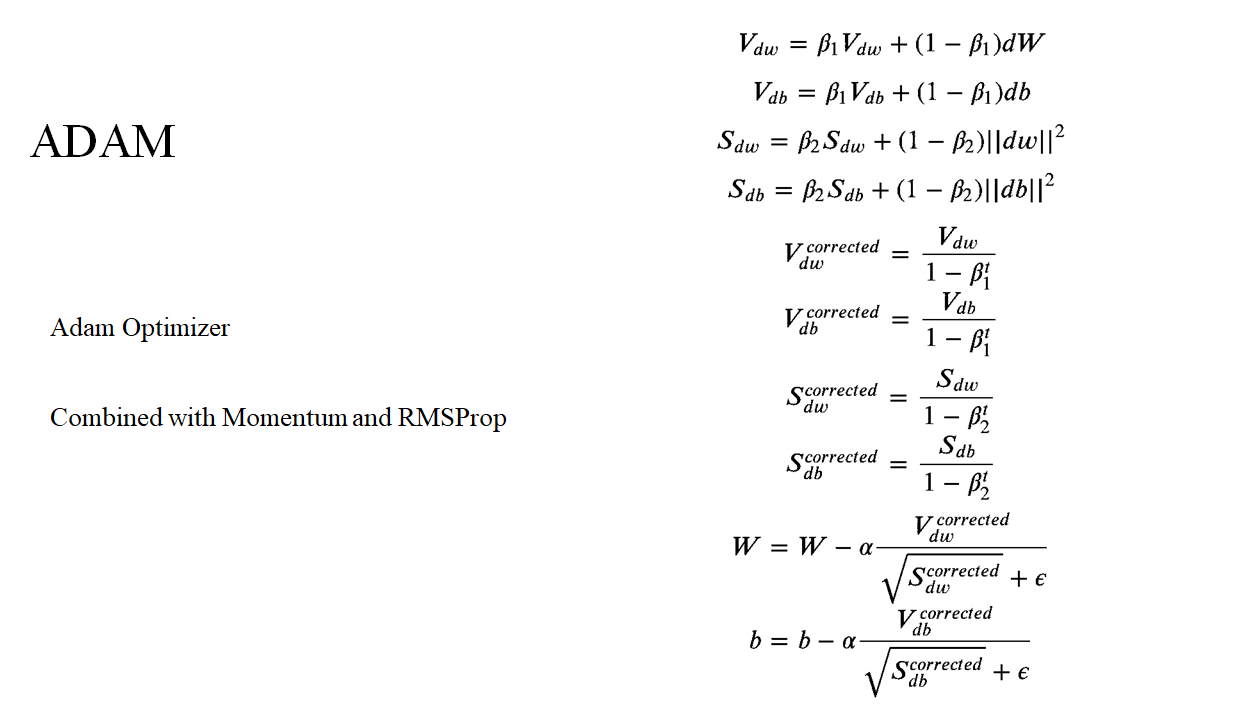